In [1]:
import networkx as nx 
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import numpy as np
import numpy.linalg as la
import pandas as pd

import sys
sys.path.append('../mchem_functions/')
import multivariate_functions as mvf

# Example from Legendre

In [2]:
coordinates_file = '../../Fieldwork/QGIS maps/SamplingPoints.csv'
# pd.read_csv(coordinates_file)[['field_1','Easting','Northing']]
expl_var_file = 'explanatory_variables.csv'

In [3]:
leg_coord = []
n = 0
leg_sites = np.arange(50)
for i in leg_sites:
    leg_coord.append([n,0])
    n += 1
leg_coord = np.array(leg_coord)

In [4]:
leg_dist_matr = mvf.eucl_dist(leg_coord)

In [5]:
leg_threshold = mvf.mintree_threshold(leg_dist_matr)

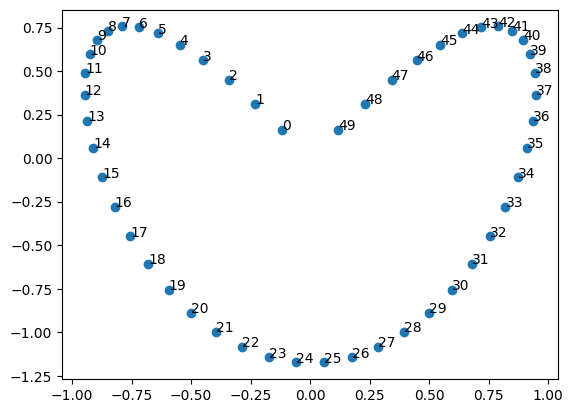

In [6]:
(leg_eigvals,leg_eigvecs,
 leg_coordinates,leg_proportion_explained) = mvf.dbMEM(leg_dist_matr,leg_threshold)

fig_dbMEM, ax_dbMEM = plt.subplots()
ax_dbMEM.scatter(leg_coordinates[:,0],leg_coordinates[:,1])

for i in range(len(leg_coordinates)):
    ax_dbMEM.text(leg_coordinates[i,0],leg_coordinates[i,1],f'{i}')

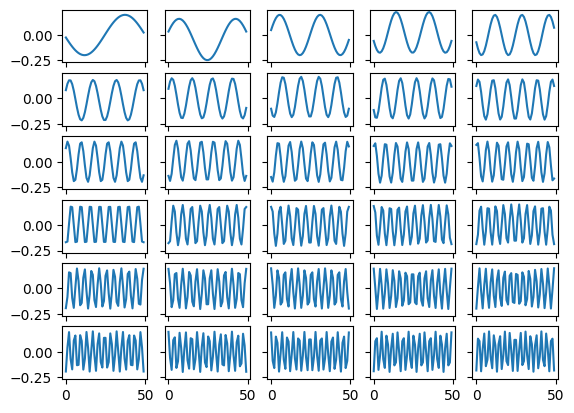

In [7]:
chosen_dbMEM = [1,2,3,4,5,10,20,30,31,39]
chosen_dbMEM = np.arange(1,31)
ncols = 5

def plot_dbMEM(chosen_dbMEM,ncols,method:str='plot'):
    fig, axs = plt.subplots(ncols=ncols, nrows=int(np.ceil(len(chosen_dbMEM)/ncols)), sharex=1, sharey = 1)

    for i in range(len(chosen_dbMEM)):
        dbMEM = chosen_dbMEM[i]-1

        col = i % ncols
        row = int(np.floor(i / ncols))

        if method in ['plot','line']: kwargs = {}
        elif method in ['scatter']: kwargs = {'ls':'none','marker':'.'}

        axs[row,col].plot(leg_sites,leg_eigvecs[:,dbMEM],**kwargs)

plot_dbMEM(chosen_dbMEM,ncols)

# My data

In [8]:
coordinates_file = '../../Fieldwork/QGIS maps/SamplingPoints.csv'
threshold_times = 4

In [9]:
coord_df = pd.read_csv(coordinates_file)[['field_1','Easting','Northing']]

AM_coord_df = coord_df[coord_df['field_1'].str.contains('AM')]
AM_letters = AM_coord_df['field_1'].to_numpy()
AM_coord_array = AM_coord_df[['Easting','Northing']].to_numpy()

HM_coord_df = coord_df[coord_df['field_1'].str.contains('HM')]
HM_letters = HM_coord_df['field_1'].to_numpy()
HM_coord_array = HM_coord_df[['Easting','Northing']].to_numpy()
# HM_coord_array

In [10]:
HM_coord_df['field_1'] = [x.replace('PW-','') for x in HM_coord_df['field_1']]

C:\Users\polim\AppData\Local\Temp\ipykernel_19168\470778764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HM_coord_df['field_1'] = [x.replace('PW-','') for x in HM_coord_df['field_1']]


Text(0.5, 1.0, 'HM Map')

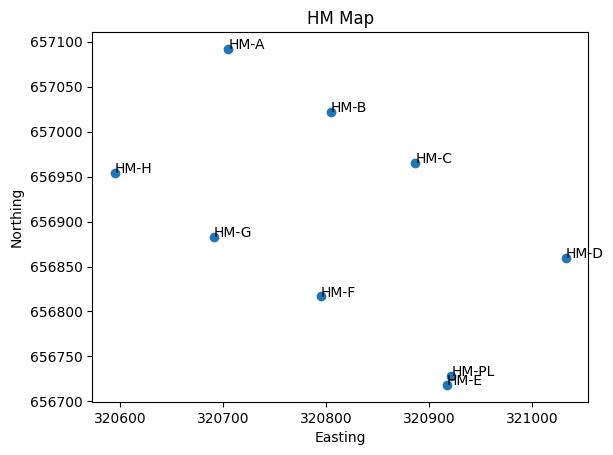

In [11]:
fig_HM_map, ax_HM_map = plt.subplots()
x = 'Easting'
y = 'Northing'
ax_HM_map.scatter(HM_coord_df[x],HM_coord_df[y])

for i in range(len(HM_coord_df)):
    ax_HM_map.text(HM_coord_df[x].to_numpy()[i],HM_coord_df[y].to_numpy()[i],HM_coord_df['field_1'].to_numpy()[i])

ax_HM_map.set_xlabel(x)
ax_HM_map.set_ylabel(y)
ax_HM_map.set_title('HM Map')

Text(0.5, 1.0, 'AM Map')

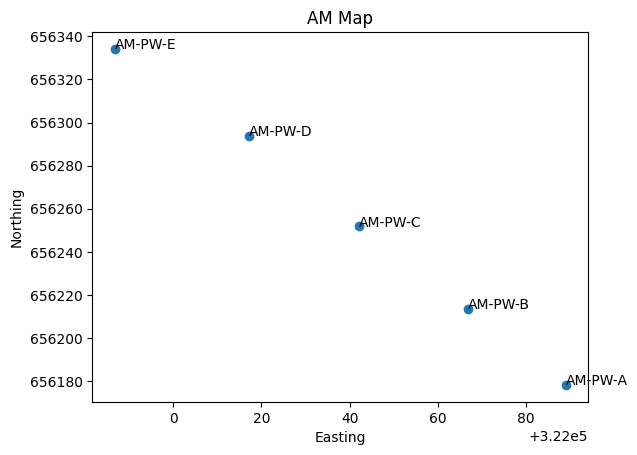

In [12]:
fig_AM_map, ax_AM_map = plt.subplots()
x = 'Easting'
y = 'Northing'
ax_AM_map.scatter(AM_coord_df[x],AM_coord_df[y])

for i in range(len(AM_coord_df)):
    ax_AM_map.text(AM_coord_df[x].to_numpy()[i],AM_coord_df[y].to_numpy()[i],AM_coord_df['field_1'].to_numpy()[i])

ax_AM_map.set_xlabel(x)
ax_AM_map.set_ylabel(y)
ax_AM_map.set_title('AM Map')

In [13]:
HM_dist_matr = mvf.eucl_dist(HM_coord_array)
AM_dist_matr = mvf.eucl_dist(AM_coord_array)
# pd.DataFrame(HM_dist_matr,index=HM_letters,columns=HM_letters)

In [14]:
HM_threshold = mvf.mintree_threshold(HM_dist_matr)
AM_threshold = mvf.mintree_threshold(AM_dist_matr)

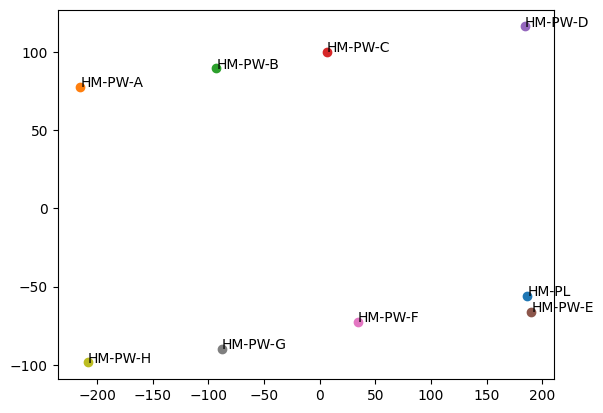

In [15]:
# PCoA
fig_pcoa, ax_pcoa = plt.subplots()
pcoa_eigvals,pcoa_eigvecs,_,pcoa_coordinates,pcoa_proportion_explained = mvf.PCoA(HM_dist_matr,[],number_of_dimensions=2)
for i in range(len(HM_letters)):
    ax_pcoa.scatter(-pcoa_coordinates[i,0],pcoa_coordinates[i,1])
    ax_pcoa.text(-pcoa_coordinates[i,0],pcoa_coordinates[i,1],HM_letters[i])

In [17]:
def wetordry(str):
    if str in ([f'HM-{x}' for x in ['A','B','C','D']] + [f'AM-{x}' for x in ['A','B']]):
        return 'dry'
    else: return 'wet'

wetordry_colours = {
    'dry': 'orange',
    'wet': 'blue'
}
hm_wetordry_arr = np.array([wetordry(x.replace('PW-','')) for x in HM_letters])
am_wetordry_arr = np.array([wetordry(x.replace('PW-','')) for x in AM_letters])

def add_ticks(ax,axis,mult=.2,no_of_minorticks=1):
    if axis == 'x':
        ax_set_ticks = ax.set_xticks
        lims = ax.get_xlim()
        lims_range = np.max(lims)-np.min(lims)
        set_minor_ticks = ax.xaxis.set_minor_locator
    elif axis == 'y':
        ax_set_ticks = ax.set_yticks
        lims = ax.get_ylim()
        lims_range = np.max(lims)-np.min(lims)
        set_minor_ticks = ax.yaxis.set_minor_locator

    step = mult*lims_range
    major_ticks = np.arange(np.min(lims),np.max(lims)+step*.2,step)
    ax_set_ticks(major_ticks)
    set_minor_ticks(AutoMinorLocator(no_of_minorticks+1))

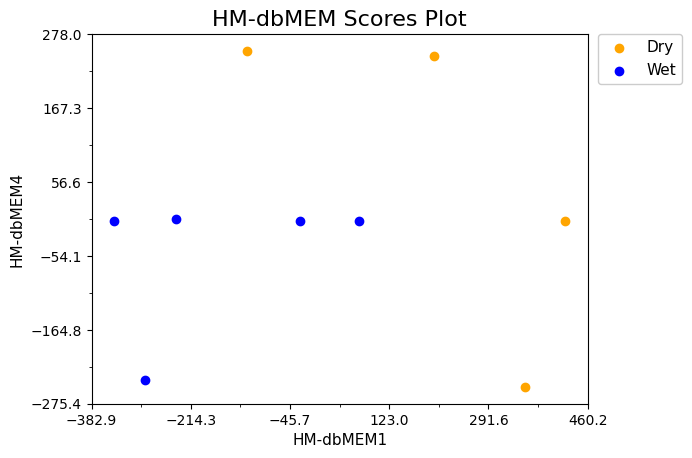

In [18]:
# dbMEM
fig_dbMEM, ax_dbMEM = plt.subplots()
(HM_eigvals,HM_eigvecs,
 HM_coordinates,HM_proportion_explained) = mvf.dbMEM(HM_dist_matr,HM_threshold)
chosen_dbMEMs = [1,4]

for wor in wetordry_colours:
    ax_dbMEM.scatter(HM_coordinates[np.where(hm_wetordry_arr==wor),chosen_dbMEMs[0]-1],HM_coordinates[np.where(hm_wetordry_arr==wor),chosen_dbMEMs[1]-1],
                     c=wetordry_colours[wor],label=wor.capitalize())
    # ax_dbMEM.text(HM_coordinates[i,chosen_dbMEMs[0]-1],HM_coordinates[i,chosen_dbMEMs[1]-1],HM_letters[i])

ax_dbMEM.set_xlabel(f'HM-dbMEM{chosen_dbMEMs[0]}',fontsize=11)
ax_dbMEM.set_ylabel(f'HM-dbMEM{chosen_dbMEMs[1]}',fontsize=11)

ax_dbMEM.set_title(f'HM-dbMEM Scores Plot',fontsize=16)

ax_dbMEM.legend(framealpha=1,bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,fontsize=11)
add_ticks(ax_dbMEM,'x')
add_ticks(ax_dbMEM,'y')
fig_dbMEM.savefig(f'hm_dbmem{chosen_dbMEMs[0]}v{chosen_dbMEMs[1]}.svg', dpi=600, facecolor = '#fffa', bbox_inches='tight')


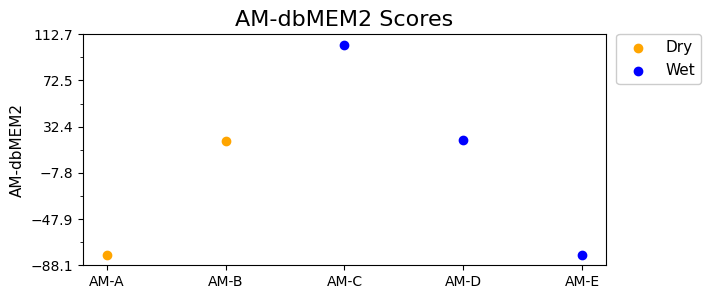

In [19]:
# dbMEM
fig_dbMEM, ax_dbMEM = plt.subplots(figsize=(6.75,3))
(AM_eigvals,AM_eigvecs,
 AM_coordinates,AM_proportion_explained) = mvf.dbMEM(AM_dist_matr,AM_threshold)
chosen_dbMEMs = [2]
ticks = np.arange(len(AM_coordinates[:,chosen_dbMEMs[0]-1]))

for wor in wetordry_colours:
    ax_dbMEM.scatter(ticks[np.where(am_wetordry_arr==wor)],AM_coordinates[np.where(am_wetordry_arr==wor),chosen_dbMEMs[0]-1],
                     c=wetordry_colours[wor],label=wor.capitalize())

ax_dbMEM.set_ylabel(f'AM-dbMEM{chosen_dbMEMs[0]}',fontsize=11)

ax_dbMEM.set_title(f'AM-dbMEM2 Scores',fontsize=16)

ax_dbMEM.set_xticks(ticks)
ax_dbMEM.set_xticklabels([x.replace('PW-','') for x in AM_letters])

ax_dbMEM.legend(framealpha=1,bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,fontsize=11)
add_ticks(ax_dbMEM,'y')
fig_dbMEM.savefig(f'am_dbmem{chosen_dbMEMs[0]}.svg', dpi=600, facecolor = '#fffa', bbox_inches='tight')

In [106]:
HM_dbMEM_dist = mvf.eucl_dist(HM_coordinates)
# pd.DataFrame(HM_dbMEM_dist,index=HM_letters,columns=HM_letters)

In [107]:
expl_var = pd.read_csv(expl_var_file,index_col=None)


samples = expl_var['samples'].to_numpy()
seasons = []
for s in samples:
    s = s.split('-')
    if s[-1] not in seasons:
        seasons.append(s[-1])

dbmem_col = list(AM_coordinates) + list(HM_coordinates)
dbmem_col = dbmem_col * len(seasons)

expl_var['dbMEM'] = dbmem_col

expl_var.to_csv(expl_var_file,index=False)

In [108]:
dbmem_col

[array([-99.3400016 , -78.7593163 ,  16.33572206]),
 array([-99.60078898,  19.73686356, -16.16607815]),
 array([-4.20306534e-02,  1.03563286e+02, -3.39747541e-01]),
 array([99.60134241, 20.40241463, 16.64752984]),
 array([ 99.86258489, -78.96749804, -16.47758352]),
 array([-344.5710862 , -200.25413792,  119.07882164,   -2.26967301,
          -2.93431742]),
 array([ 353.34078924, -120.2048989 ,  155.05879574, -250.2922718 ,
         111.56232036]),
 array([ 421.88031991, -175.76759783,  -42.3419943 ,   -2.25669382,
         -43.33766066]),
 array([ 198.2542014 , -109.82231122, -309.21362802,  245.95486487,
         -61.1335068 ]),
 array([-118.7705566 , -136.3984051 ,  380.61580844,  252.85071852,
          47.42892119]),
 array([-292.58615577, -135.73218201,  -80.17669186, -239.5459433 ,
        -128.22986749]),
 array([-238.86008362,   20.31321218, -313.18499299,    0.44743249,
         108.55254823]),
 array([-28.50281507, 435.43540467, -41.91461366,  -2.220591  ,
        133.6302971